In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/spam.csv", encoding='latin-1')[['v1', 'v2']]

In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.columns = ['label', 'text']

In [ ]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
print("Shape:", df.shape)

Shape: (5572, 2)


In [ ]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = text.strip()
    text = ' '.join([word for word in text.split() if word not in stop_words])  # remove stopwords
    return text

In [ ]:
df['clean_text'] = df['text'].apply(clean_text)

In [ ]:
df[['text', 'clean_text']].head()

,text,clean_text
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-18-2658054973.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


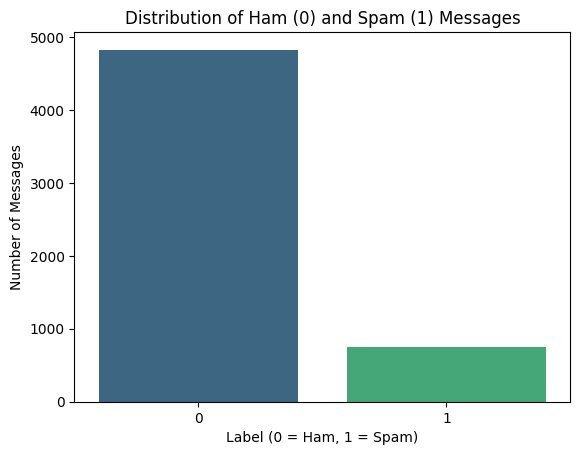

In [ ]:
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribution of Ham (0) and Spam (1) Messages')
plt.xlabel('Label (0 = Ham, 1 = Spam)')
plt.ylabel('Number of Messages')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df['clean_text']
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
print("Training samples:", len(X_train))
print("Test samples:", len(X_test))

Training samples: 4457
Test samples: 1115


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
print("TF-IDF shape (Train):", X_train_tfidf.shape)
print("TF-IDF shape (Test):", X_test_tfidf.shape)

TF-IDF shape (Train): (4457, 3000)
TF-IDF shape (Test): (1115, 3000)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

# SVM
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
def evaluate_model(name, model):
    print(f"\n📊 Evaluation: {name}")
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

In [ ]:
evaluate_model("Logistic Regression", lr_model)
evaluate_model("Support Vector Machine", svm_model)
evaluate_model("Random Forest", rf_model)


📊 Evaluation: Logistic Regression
Accuracy: 0.9677
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.98      0.77      0.86       149

    accuracy                           0.97      1115
   macro avg       0.97      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115


📊 Evaluation: Support Vector Machine
Accuracy: 0.9883
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.92      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115


📊 Evaluation: Random Forest
Accuracy: 0.9740
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1   

In [ ]:
def predict_message(text, model):
    cleaned = clean_text(text)
    vector = tfidf.transform([cleaned])
    prediction = model.predict(vector)[0]
    print("📨 Message:", text)
    print("🧠 Prediction:", "📬 Spam" if prediction == 1 else "📩 Not Spam")

In [ ]:
predict_message("Congratulations! You've won a free iPhone. Claim now!", lr_model)

📨 Message: Congratulations! You've won a free iPhone. Claim now!
🧠 Prediction: 📬 Spam


In [ ]:
predict_message("Hey, are we still meeting at 6pm today?", lr_model)

📨 Message: Hey, are we still meeting at 6pm today?
🧠 Prediction: 📩 Not Spam


In [ ]:
predict_message("URGENT! Your account has been suspended. Click the link to reactivate immediately.", lr_model)

📨 Message: URGENT! Your account has been suspended. Click the link to reactivate immediately.
🧠 Prediction: 📩 Not Spam


In [ ]:
predict_message("Don’t forget to bring your ID card for tomorrow’s meeting.", lr_model)

📨 Message: Don’t forget to bring your ID card for tomorrow’s meeting.
🧠 Prediction: 📩 Not Spam


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_conf_matrix(model, title):
    y_pred = model.predict(X_test_tfidf)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

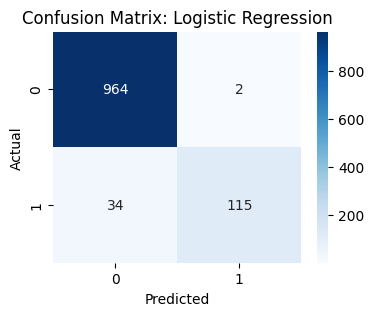

In [ ]:
plot_conf_matrix(lr_model, "Logistic Regression")

In [ ]:
models = {'Logistic Regression': lr_model, 'SVM': svm_model, 'Random Forest': rf_model}

In [ ]:
for name, model in models.items():
    acc = accuracy_score(y_test, model.predict(X_test_tfidf))
    print(f"{name:25s} → Accuracy: {acc:.4f}")

Logistic Regression       → Accuracy: 0.9677
SVM                       → Accuracy: 0.9883
Random Forest             → Accuracy: 0.9740
